In [1]:
import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

X = pd.read_csv('train_v9rqX0R.csv', index_col = ['Item_Identifier', 'Outlet_Identifier'], na_filter = True)
X_test = pd.read_csv('test_AbJTz2l.csv', index_col = ['Item_Identifier', 'Outlet_Identifier'], na_filter = True)

In [3]:
X.Item_Weight.mean(), X.Outlet_Size.mode(), X_test.Item_Weight.mean(), X_test.Outlet_Size.mode()

(12.857645184136183, 0    Medium
 dtype: object, 12.695633368756374, 0    Medium
 dtype: object)

In [4]:
values = {'Item_Weight':X.Item_Weight.mean(), 'Outlet_Size':X.Outlet_Size.mode()}
X = X.fillna(value = values)
values = {'Item_Weight':X_test.Item_Weight.mean(), 'Outlet_Size':X_test.Outlet_Size.mode()}
X_test = X_test.fillna(value = values)

In [5]:
X.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
X.replace(['low fat', 'LF'], 'Low Fat', inplace = True)
X.replace('reg', 'Regular', inplace = True)

X_test.replace(['low fat', 'LF'], 'Low Fat', inplace = True)
X_test.replace('reg', 'Regular', inplace = True)

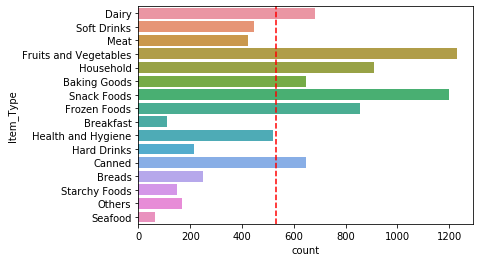

In [7]:
grp = sns.countplot(y=X['Item_Type'])
grp.axvline(532.6875,ls='--', color = 'r')

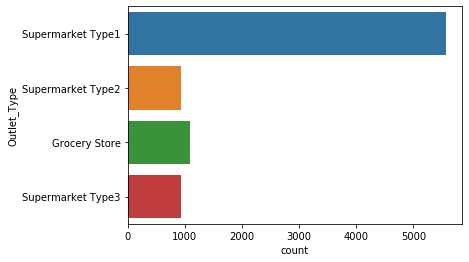

In [8]:
grp = sns.countplot(y=X['Outlet_Type'])

In [9]:
cols = [col for col in X.columns if X[col].dtype == object]
for i in cols:
    n = X[i].unique()
    X[i].replace(n, range(len(n)), inplace = True)
    X_test[i].replace(n, range(len(n)), inplace = True)

In [10]:
X['Item_Outlet_Type'] = (X['Item_Type'] + 1) * (X['Outlet_Type'] + 1)
X['Item_Fat_Outlet_size'] = (X['Item_Fat_Content'] + 1) * (X['Outlet_Size'] + 1)
X['Outlet_Est_Year'] = (max(X['Outlet_Establishment_Year']) + 1) - X['Outlet_Establishment_Year']
X['IOS'] = X['Item_Outlet_Sales']
X.drop(['Item_Type', 'Outlet_Type', 
        'Item_Fat_Content', 'Outlet_Size', 
        'Outlet_Establishment_Year','Item_Outlet_Sales'], 
       axis = 1, inplace = True)

X_test['Item_Outlet_Type'] = (X_test['Item_Type'] + 1) * (X_test['Outlet_Type'] + 1)
X_test['Item_Fat_Outlet_size'] = (X_test['Item_Fat_Content'] + 1) * (X_test['Outlet_Size'] + 1)
X_test['Outlet_Est_Year'] = (max(X_test['Outlet_Establishment_Year']) + 1) - X_test['Outlet_Establishment_Year']
X_test.drop(['Item_Type', 'Outlet_Type', 
        'Item_Fat_Content', 'Outlet_Size', 
        'Outlet_Establishment_Year'], 
       axis = 1, inplace = True)
X.head()

,,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Item_Outlet_Type,Item_Fat_Outlet_size,Outlet_Est_Year,IOS
Item_Identifier,Outlet_Identifier,,,,,,,,
FDA15,OUT049,9.30,0.016047,249.8092,0,1,1,11,3735.1380
DRC01,OUT018,5.92,0.019278,48.2692,1,4,2,1,443.4228
FDN15,OUT049,17.50,0.016760,141.6180,0,3,1,11,2097.2700
FDX07,OUT010,19.20,0.000000,182.0950,1,12,4,12,732.3800
NCD19,OUT013,8.93,0.000000,53.8614,1,5,3,23,994.7052


In [11]:
y = X.IOS              
X.drop(['IOS'], axis=1, inplace=True)
index = X_test.index

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.30,
                                                                random_state=42)

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

it = []

for i in range(1):
    model = GradientBoostingRegressor(learning_rate = 0.099, 
                                      loss = 'ls', 
                                      n_estimators = 77,   
                                      random_state = 90,
                                      warm_start = True
                                     )
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    score_train = model.score(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    score_test = model.score(X_valid, y_valid)
    it.append(score_test)
    print(score_train, score_test)
it.index(min(it))
print(model.feature_importances_)

0.6153785925512746 0.5972050468642547
[0.00356965 0.04481733 0.54805502 0.00448419 0.02571715 0.04922484
 0.32413181]


In [16]:
from catboost import CatBoostRegressor

it = []

for i in range(1):
    model = CatBoostRegressor(learning_rate = 0.001*6, 
                              #eval_metric = 'R2', 
                              #loss_function='RMSE', 
                              #depth = 6
                             )
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    score_train = model.score(X_train, y_train)
    y_pred_valid = model.predict(X_valid)
    score_test = model.score(X_valid, y_valid)
    it.append(score_test)
    print(score_train, score_test)
it.index(min(it))

0:	learn: 1715.6432485	total: 82.8ms	remaining: 1m 22s
1:	learn: 1710.7576611	total: 87ms	remaining: 43.4s
2:	learn: 1706.0037222	total: 90.7ms	remaining: 30.1s
3:	learn: 1701.2478732	total: 95.5ms	remaining: 23.8s
4:	learn: 1696.2755295	total: 101ms	remaining: 20s
5:	learn: 1692.0220814	total: 104ms	remaining: 17.3s
6:	learn: 1687.2317057	total: 108ms	remaining: 15.3s
7:	learn: 1682.7205620	total: 112ms	remaining: 13.9s
8:	learn: 1678.0262009	total: 116ms	remaining: 12.8s
9:	learn: 1673.2591299	total: 119ms	remaining: 11.8s
10:	learn: 1668.7059487	total: 124ms	remaining: 11.1s
11:	learn: 1663.6055778	total: 127ms	remaining: 10.5s
12:	learn: 1660.1381881	total: 131ms	remaining: 9.95s
13:	learn: 1657.1878309	total: 135ms	remaining: 9.48s
14:	learn: 1652.6086057	total: 138ms	remaining: 9.09s
15:	learn: 1648.3310730	total: 142ms	remaining: 8.74s
16:	learn: 1644.1922105	total: 146ms	remaining: 8.42s
17:	learn: 1639.9106957	total: 150ms	remaining: 8.17s
18:	learn: 1636.8086120	total: 155ms	

157:	learn: 1286.0818187	total: 752ms	remaining: 4.01s
158:	learn: 1284.5633624	total: 756ms	remaining: 4s
159:	learn: 1282.7295778	total: 763ms	remaining: 4s
160:	learn: 1281.1168464	total: 767ms	remaining: 4s
161:	learn: 1280.2601591	total: 771ms	remaining: 3.99s
162:	learn: 1278.8948026	total: 776ms	remaining: 3.98s
163:	learn: 1277.9403235	total: 780ms	remaining: 3.97s
164:	learn: 1276.4286935	total: 784ms	remaining: 3.97s
165:	learn: 1274.4641263	total: 788ms	remaining: 3.96s
166:	learn: 1273.2706412	total: 791ms	remaining: 3.95s
167:	learn: 1272.3006336	total: 795ms	remaining: 3.94s
168:	learn: 1270.8305860	total: 800ms	remaining: 3.93s
169:	learn: 1269.3287407	total: 803ms	remaining: 3.92s
170:	learn: 1267.8220794	total: 807ms	remaining: 3.91s
171:	learn: 1266.2081627	total: 810ms	remaining: 3.9s
172:	learn: 1265.3265818	total: 814ms	remaining: 3.89s
173:	learn: 1264.5006248	total: 818ms	remaining: 3.88s
174:	learn: 1262.6707873	total: 822ms	remaining: 3.88s
175:	learn: 1261.415

325:	learn: 1141.5702800	total: 1.41s	remaining: 2.92s
326:	learn: 1140.9036587	total: 1.41s	remaining: 2.91s
327:	learn: 1140.3293061	total: 1.42s	remaining: 2.9s
328:	learn: 1139.6782225	total: 1.42s	remaining: 2.9s
329:	learn: 1139.1449846	total: 1.43s	remaining: 2.9s
330:	learn: 1138.7615846	total: 1.43s	remaining: 2.89s
331:	learn: 1138.2081515	total: 1.44s	remaining: 2.9s
332:	learn: 1137.5735911	total: 1.45s	remaining: 2.9s
333:	learn: 1137.0192869	total: 1.45s	remaining: 2.89s
334:	learn: 1136.3910498	total: 1.45s	remaining: 2.88s
335:	learn: 1135.8902415	total: 1.46s	remaining: 2.88s
336:	learn: 1135.4815436	total: 1.46s	remaining: 2.88s
337:	learn: 1134.9712937	total: 1.47s	remaining: 2.87s
338:	learn: 1134.4041787	total: 1.47s	remaining: 2.86s
339:	learn: 1133.9079123	total: 1.47s	remaining: 2.86s
340:	learn: 1133.5434878	total: 1.48s	remaining: 2.85s
341:	learn: 1133.0400889	total: 1.48s	remaining: 2.85s
342:	learn: 1132.6133056	total: 1.48s	remaining: 2.84s
343:	learn: 113

488:	learn: 1095.8107085	total: 2.08s	remaining: 2.17s
489:	learn: 1095.6966278	total: 2.08s	remaining: 2.17s
490:	learn: 1095.6035412	total: 2.08s	remaining: 2.16s
491:	learn: 1095.4950111	total: 2.09s	remaining: 2.16s
492:	learn: 1095.4349429	total: 2.09s	remaining: 2.15s
493:	learn: 1095.2399748	total: 2.1s	remaining: 2.15s
494:	learn: 1095.0994610	total: 2.1s	remaining: 2.14s
495:	learn: 1094.9843565	total: 2.1s	remaining: 2.14s
496:	learn: 1094.9073664	total: 2.11s	remaining: 2.13s
497:	learn: 1094.7578642	total: 2.11s	remaining: 2.13s
498:	learn: 1094.5638256	total: 2.12s	remaining: 2.12s
499:	learn: 1094.3683015	total: 2.12s	remaining: 2.12s
500:	learn: 1094.2475753	total: 2.12s	remaining: 2.11s
501:	learn: 1094.0570405	total: 2.13s	remaining: 2.11s
502:	learn: 1093.9641099	total: 2.13s	remaining: 2.1s
503:	learn: 1093.8033001	total: 2.13s	remaining: 2.1s
504:	learn: 1093.7291698	total: 2.14s	remaining: 2.1s
505:	learn: 1093.5577650	total: 2.15s	remaining: 2.1s
506:	learn: 1093.

655:	learn: 1078.2815331	total: 2.73s	remaining: 1.43s
656:	learn: 1078.2327806	total: 2.73s	remaining: 1.43s
657:	learn: 1078.1606969	total: 2.74s	remaining: 1.42s
658:	learn: 1078.0844716	total: 2.74s	remaining: 1.42s
659:	learn: 1077.9636950	total: 2.75s	remaining: 1.42s
660:	learn: 1077.8587972	total: 2.75s	remaining: 1.41s
661:	learn: 1077.8005212	total: 2.76s	remaining: 1.41s
662:	learn: 1077.7380141	total: 2.76s	remaining: 1.4s
663:	learn: 1077.6600948	total: 2.76s	remaining: 1.4s
664:	learn: 1077.5962950	total: 2.77s	remaining: 1.39s
665:	learn: 1077.5112773	total: 2.77s	remaining: 1.39s
666:	learn: 1077.4222080	total: 2.77s	remaining: 1.39s
667:	learn: 1077.3710320	total: 2.78s	remaining: 1.38s
668:	learn: 1077.3278604	total: 2.78s	remaining: 1.38s
669:	learn: 1077.2541941	total: 2.79s	remaining: 1.37s
670:	learn: 1077.1609330	total: 2.79s	remaining: 1.37s
671:	learn: 1077.0351352	total: 2.79s	remaining: 1.36s
672:	learn: 1077.0099175	total: 2.79s	remaining: 1.36s
673:	learn: 

839:	learn: 1067.2530620	total: 3.39s	remaining: 645ms
840:	learn: 1067.2076638	total: 3.39s	remaining: 641ms
841:	learn: 1067.1572526	total: 3.39s	remaining: 637ms
842:	learn: 1067.1027118	total: 3.4s	remaining: 633ms
843:	learn: 1067.0389431	total: 3.4s	remaining: 629ms
844:	learn: 1066.9607156	total: 3.41s	remaining: 626ms
845:	learn: 1066.9171119	total: 3.42s	remaining: 622ms
846:	learn: 1066.8802607	total: 3.42s	remaining: 618ms
847:	learn: 1066.8498520	total: 3.42s	remaining: 614ms
848:	learn: 1066.7921104	total: 3.43s	remaining: 609ms
849:	learn: 1066.7613329	total: 3.43s	remaining: 605ms
850:	learn: 1066.7103832	total: 3.43s	remaining: 601ms
851:	learn: 1066.6726576	total: 3.44s	remaining: 597ms
852:	learn: 1066.6191948	total: 3.44s	remaining: 593ms
853:	learn: 1066.5809889	total: 3.44s	remaining: 589ms
854:	learn: 1066.5210273	total: 3.45s	remaining: 585ms
855:	learn: 1066.5165728	total: 3.45s	remaining: 580ms
856:	learn: 1066.4684717	total: 3.45s	remaining: 576ms
857:	learn: 

0.6203889224141428 0.6036852065835773


0

In [17]:
from sklearn.metrics import r2_score

r2_score(y_valid, y_pred_valid)

0.6036852065835773

In [191]:
y_pred_test = model.predict(X_test)

In [192]:
submission = pd.DataFrame({'Item_Outlet_Sales': y_pred_test}, index = index)
submission.to_csv('sample_submission_8RXa3c6.csv', index=True)